<a href="https://colab.research.google.com/github/JamisonHunter/Adult-Income-Predictions/blob/main/adult_income_prediction_j_hunter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:

# setting the style for seaborn graphs
plt.style.use(['dark_background','seaborn-muted', 'seaborn-poster'])

<ipython-input-3-8f49f4079863>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['dark_background','seaborn-muted', 'seaborn-poster'])
<ipython-input-3-8f49f4079863>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['dark_background','seaborn-muted', 'seaborn-poster'])


# Load & Inspect Data

In [4]:
path1 = "/content/drive/MyDrive/adult.csv"
df = pd.read_csv(path1)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


# Data Cleaning

In [5]:
# stating the number of rows and columns in the data set
print(f"This data set has {df.shape[0]} rows and {df.shape[1]} columns.")

This data set has 48842 rows and 15 columns.


The columns "education" and "educational-num" both give us the same information but in different ways. Due to this, I will delete the "education" column.

In [6]:
df["education"].value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

In [7]:
df["educational-num"].value_counts()

9     15784
10    10878
13     8025
14     2657
11     2061
7      1812
12     1601
6      1389
4       955
15      834
5       756
8       657
16      594
3       509
2       247
1        83
Name: educational-num, dtype: int64

This confirms that the columns do in fact represent the same information.

In [8]:
# removing the education column
df = df.drop(columns = ["education"])

In [9]:
# checking to see if the column was removed
df.head()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [10]:
# checking for duplicate rows
print(f'There are {df.duplicated().sum()} duplicate rows.')

There are 52 duplicate rows.


In [11]:
# dropping duplicate rows
df = df.drop_duplicates()

In [12]:
# checking if duplicate rows have been removed
print(f'There are {df.duplicated().sum()} duplicate rows.')

There are 0 duplicate rows.


In [13]:
# checking for missing values
df.isna().sum()

age                0
workclass          0
fnlwgt             0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

There are no missing values in this data set.

In [14]:
# looking to see what columns may have inconsistencies
df.describe(include = "object")

,workclass,marital-status,occupation,relationship,race,gender,native-country,income
count,48790,48790,48790,48790,48790,48790,48790,48790
unique,9,7,15,6,5,2,42,2
top,Private,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33860,22366,6165,19703,41714,32614,43792,37109


In [15]:
df["workclass"].unique()

array(['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [16]:
df["marital-status"].unique()

array(['Never-married', 'Married-civ-spouse', 'Widowed', 'Divorced',
       'Separated', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [17]:
df["occupation"].unique()

array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv', '?',
       'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical',
       'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv',
       'Transport-moving', 'Handlers-cleaners', 'Armed-Forces'],
      dtype=object)

In [18]:
df["relationship"].unique()

array(['Own-child', 'Husband', 'Not-in-family', 'Unmarried', 'Wife',
       'Other-relative'], dtype=object)

In [19]:
df["race"].unique()

array(['Black', 'White', 'Asian-Pac-Islander', 'Other',
       'Amer-Indian-Eskimo'], dtype=object)

In [20]:
df["native-country"].unique()

array(['United-States', '?', 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France',
       'Holand-Netherlands'], dtype=object)

I found no inconsistent data.

In [21]:
# looking to see which numerical columns may have inconsistencies
df.describe(include = "number")

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48790.000000,4.879000e+04,48790.000000,48790.000000,48790.000000,48790.000000
mean,38.652798,1.896690e+05,10.078807,1080.217688,87.595573,40.425886
std,13.708493,1.056172e+05,2.570046,7455.905921,403.209129,12.392729
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175550e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781385e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376062e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


Text(0.5, 1.0, 'Age Distribution')

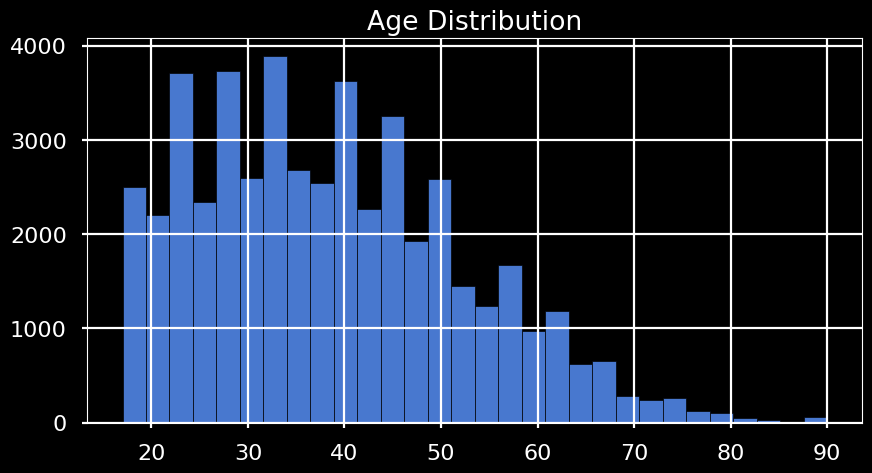

In [28]:
# checking age column distribution
fig, ax = plt.subplots(figsize=(10,5))
ax = df["age"].hist(bins = 30, edgecolor = "black")
ax.set_title("Age Distribution")

Text(0.5, 1.0, 'Final Weight Distribution')

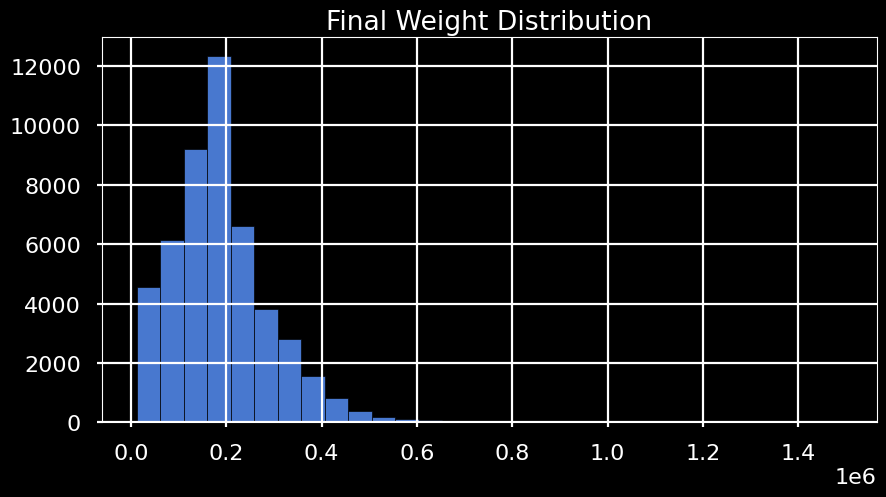

In [29]:
# checking fnlwgt distribution
fig, ax = plt.subplots(figsize=(10,5))
ax = df["fnlwgt"].hist(bins = 30, edgecolor = "black")
ax.set_title("Final Weight Distribution")

Text(0.5, 1.0, 'Education Level Distribution')

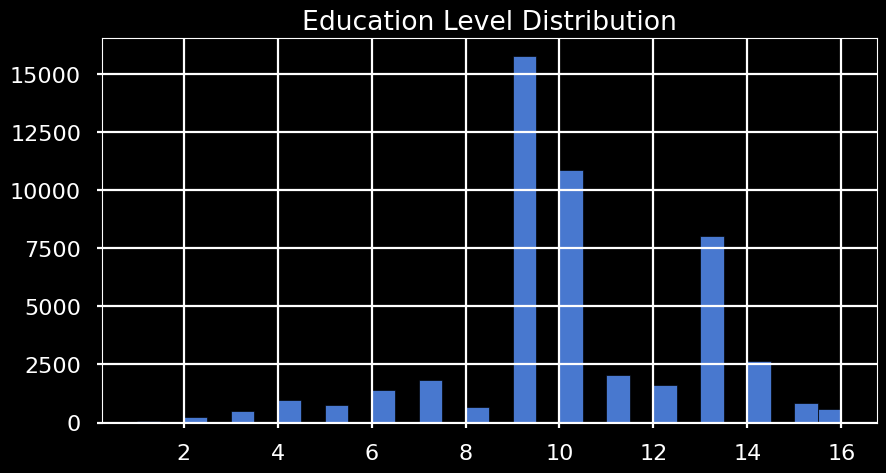

In [30]:
# checking education level distribution
fig, ax = plt.subplots(figsize=(10,5))
ax = df["educational-num"].hist(bins = 30, edgecolor = "black")
ax.set_title("Education Level Distribution")

Text(0.5, 1.0, 'Capital Gains Distribution')

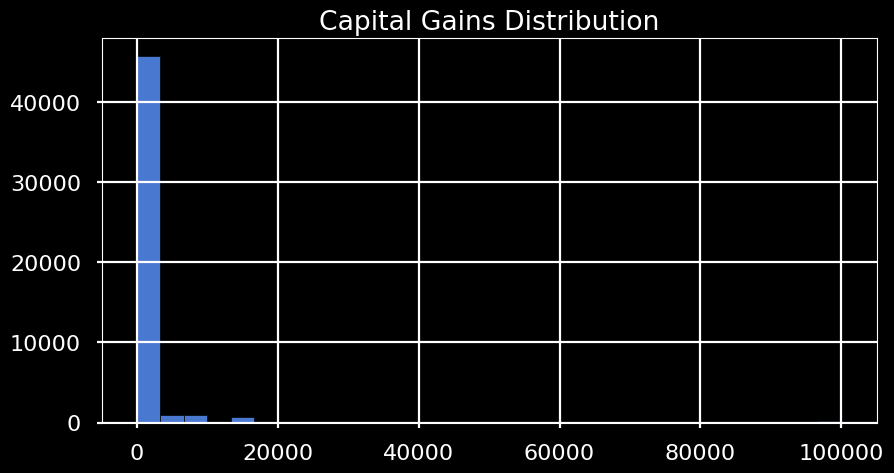

In [31]:
# checking capital-gain distribution
fig, ax = plt.subplots(figsize=(10,5))
ax = df["capital-gain"].hist(bins = 30, edgecolor = "black")
ax.set_title("Capital Gains Distribution")

Text(0.5, 1.0, 'Capital Loss Distribution')

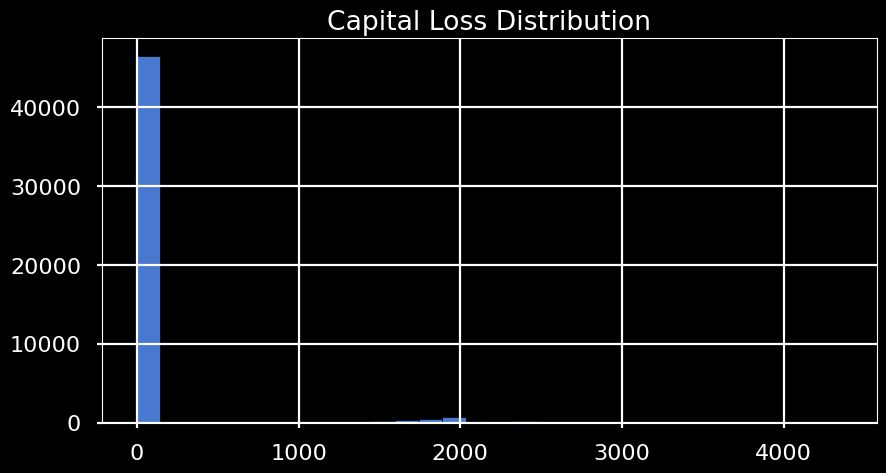

In [32]:
# checking capital-loss distribution
fig, ax = plt.subplots(figsize=(10,5))
ax = df["capital-loss"].hist(bins = 30, edgecolor = "black")
ax.set_title("Capital Loss Distribution")

Text(0.5, 1.0, 'Hours Per Week Distribution')

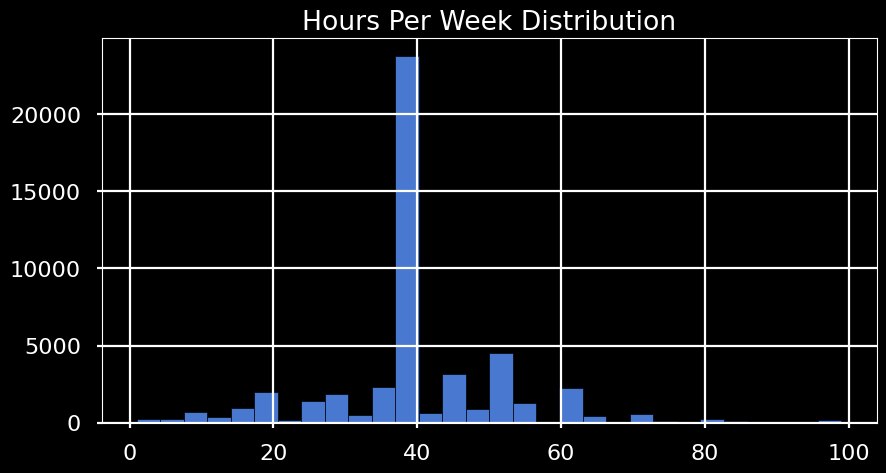

In [33]:
# checking hours-per-week distribution
fig, ax = plt.subplots(figsize=(10,5))
ax = df["hours-per-week"].hist(bins = 30, edgecolor = "black")
ax.set_title("Hours Per Week Distribution")

All of the numerical columns look sensible upon first glance.

Since the target data set will be income, I will generate a bar graph of this column data.

Text(0.5, 1.0, 'Income')

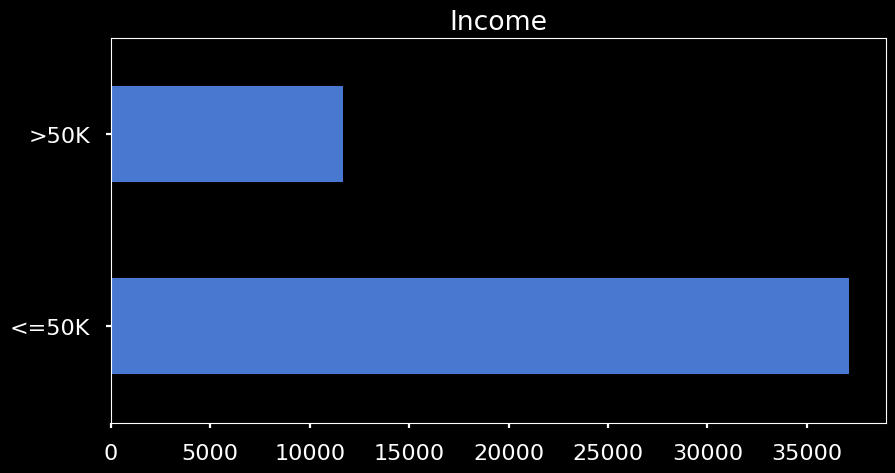

In [34]:
# generating a bar graph of income
fig, ax = plt.subplots(figsize=(10,5))
ax = df["income"].value_counts().plot(kind = "barh")
ax.set_title("Income")

We can immediately see that a minority of the income earnings are greater than $50,000 per year.